In [1]:
pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [6]:
from google.colab import files
uploaded = files.upload()  # Upload your zip file here

!unzip train.zip -d /content/  # Unzip to /content/train folder


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/unsup/5504_0.txt  
  inflating: /content/train/unsup/5505_0.txt  
  inflating: /content/train/unsup/5506_0.txt  
  inflating: /content/train/unsup/5507_0.txt  
  inflating: /content/train/unsup/5508_0.txt  
  inflating: /content/train/unsup/5509_0.txt  
  inflating: /content/train/unsup/550_0.txt  
  inflating: /content/train/unsup/5510_0.txt  
  inflating: /content/train/unsup/5511_0.txt  
  inflating: /content/train/unsup/5512_0.txt  
  inflating: /content/train/unsup/5513_0.txt  
  inflating: /content/train/unsup/5514_0.txt  
  inflating: /content/train/unsup/5515_0.txt  
  inflating: /content/train/unsup/5516_0.txt  
  inflating: /content/train/unsup/5517_0.txt  
  inflating: /content/train/unsup/5518_0.txt  
  inflating: /content/train/unsup/5519_0.txt  
  inflating: /content/train/unsup/551_0.txt  
  inflating: /content/train/unsup/5520_0.txt  
  inflating: /content/train/unsup/5521_0.txt  
  inflating

In [7]:
data_dir='/content/train'

In [8]:
import os
import pandas as pd

def load_imdb_data(data_dir):
    data = []
    for label in ['pos', 'neg']:
        folder = os.path.join(data_dir, label)
        for filename in os.listdir(folder):
            with open(os.path.join(folder, filename), encoding='utf-8') as f:
                review = f.read()
                data.append([review, label])
    return pd.DataFrame(data, columns=['review', 'sentiment'])

# Set your path here
data_dir = '/content/train'  # Update if different
df = load_imdb_data(data_dir)

# Check a few rows
df.head()


,review,sentiment
0,"Listening to the soundtrack at the moment, the...",pos
1,"My very favorite character in films, but in ne...",pos
2,"When I started watching ""Fay Grim"", I had no i...",pos
3,Wow. What a wonderful film. The script is near...,pos
4,It's so rare to find a film that provides a pl...,pos


In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)

# Check cleaned data
df[['review', 'clean_review']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,clean_review
0,"Listening to the soundtrack at the moment, the...",listening soundtrack moment images come back v...
1,"My very favorite character in films, but in ne...",favorite character films nearly character zorr...
2,"When I started watching ""Fay Grim"", I had no i...",started watching fay grim idea sequel henry fo...
3,Wow. What a wonderful film. The script is near...,wow wonderful film script nearly perfect appea...
4,It's so rare to find a film that provides a pl...,rare find film provides plot figured every tur...


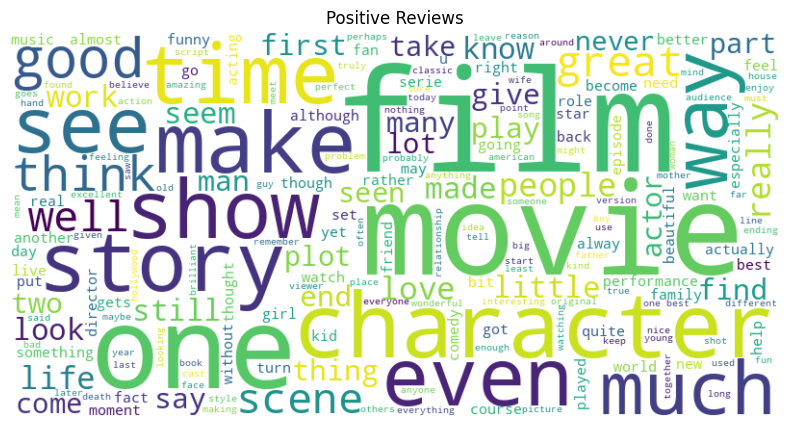

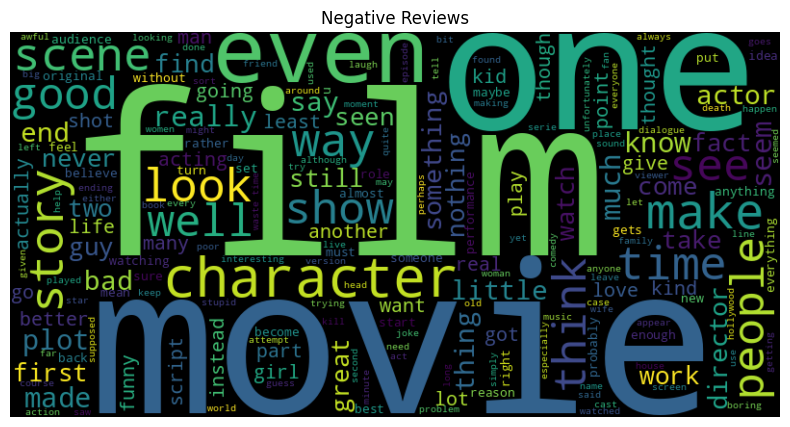

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive WordCloud
pos_text = ' '.join(df[df['sentiment'] == 'pos']['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

# Negative WordCloud
neg_text = ' '.join(df[df['sentiment'] == 'neg']['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the clean text
X = vectorizer.fit_transform(df['clean_review']).toarray()

# Encode target labels: 'pos' = 1, 'neg' = 0
y = df['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the clean text
X = vectorizer.fit_transform(df['clean_review']).toarray()

# Encode target labels: 'pos' = 1, 'neg' = 0
y = df['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Add this line

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8868
Confusion Matrix:
 [[2162  323]
 [ 243 2272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      2485
           1       0.88      0.90      0.89      2515

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8868
Naive Bayes Accuracy: 0.8522
SVM Accuracy: 0.8740
Random Forest Accuracy: 0.8504


In [18]:
import streamlit as st

st.title("🎭 Movie Review Sentiment Analysis")

review = st.text_area("Enter a movie review:")

if st.button("Predict Sentiment"):
    if review.strip() != "":
        sentiment = predict_sentiment(review)
        st.success(f"Predicted Sentiment: {sentiment}")
    else:
        st.warning("Please enter a review.")


2025-06-02 16:08:53.249 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.368 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-02 16:08:53.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:08:53.376 Session state does not 

In [27]:
# Install necessary libraries if not already done
!pip install transformers torch

# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Define the predict_sentiment function
def predict_sentiment(text, tokenizer, model): # Add tokenizer and model as arguments
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=256
    )
    with torch.no_grad():
        outputs = model(**inputs)
    # Assuming a binary classification model where 1 is positive and 0 is negative
    prediction = torch.argmax(outputs.logits).item()
    return "Positive 😊" if prediction == 1 else "Negative 😞"

# Load a pre-trained tokenizer and model for sentiment analysis
# You can choose a specific model from Hugging Face, e.g., 'distilbert-base-uncased-finetuned-sst-2-english'
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
transformer_model = AutoModelForSequenceClassification.from_pretrained(model_name)


# Try it with user input, passing the tokenizer and transformer_model
user_input = input("Enter a review: ")
# Use the transformer_model with the predict_sentiment function
print("Predicted Sentiment:", predict_sentiment(user_input, tokenizer, transformer_model))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 610.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Enter a review: not happy
Predicted Sentiment: Negative 😞


In [32]:
transformer_model.save_pretrained("model")
tokenizer.save_pretrained("model")

('model/tokenizer_config.json',
 'model/special_tokens_map.json',
 'model/vocab.txt',
 'model/added_tokens.json',
 'model/tokenizer.json')